<center>
<h1>
Traitement d’images TP 2 : Segmentation
</h1>
</center>


<p style='text-align: justify;width:90%;margin:auto'>
Dans  le  domaine  du  traitement  d’image,  la  segmentation  d'une  image  est  le  processus  qui 
consiste à diviser une image en plusieurs segments. L'objectif de la segmentation d'une image 
est  de  changer  la  représentation  d'une  image  en  quelque  chose  de  plus  significatif  et  de  plus 
facile à analyser. Elle est généralement utilisée pour localiser des objets et créer des frontières. 
 </p>




# Segmentation approche pixels 

##        Seuillage

<p style='text-align: justify;width:80%;margin:auto'>
Dans cette partie, nous allons tester plusieurs techniques de seuillage d’image. Nous allons
tester le seuillage simple (global), le seuillage adaptatif et le seuillage à seuil automatique.
Dans le cas du seuillage simple, la valeur globale du seuil est utilisée et reste constante tout au
long du processus. Dans le cas du seuillage adaptatif, la valeur du seuil est calculée pour des
régions locales plus petites, avec des valeurs de seuil différentes pour différentes régions en
fonction du changement d'éclairage.
Dans le seuillage automatique (ici on va traiter la méthode de Otsu), la valeur du seuil n'est pas
choisie mais déterminée automatiquement. Une image bimodale (deux valeurs d'image
distinctes) est considérée. L'histogramme généré contient deux pics. Une condition générique
consisterait donc à choisir une valeur seuil qui se situe au milieu des deux valeurs de crête de
l'histogramme.
</p>

1. Réaliser  un  seuillage  de  l’image  ‘cameraman.tif’  avec  les  trois  techniques.  Nous 
utiliserons : 
- La fonction cv2.threshold avec des valeurs de seuils choisis manuellement pour le 
seuillage simple. 
- La fonction cv2.adaptiveThreshold pour le seuillage adaptatif. 
- La fonction cv2.threshold avec un flag cv2.THRESH_OTSU

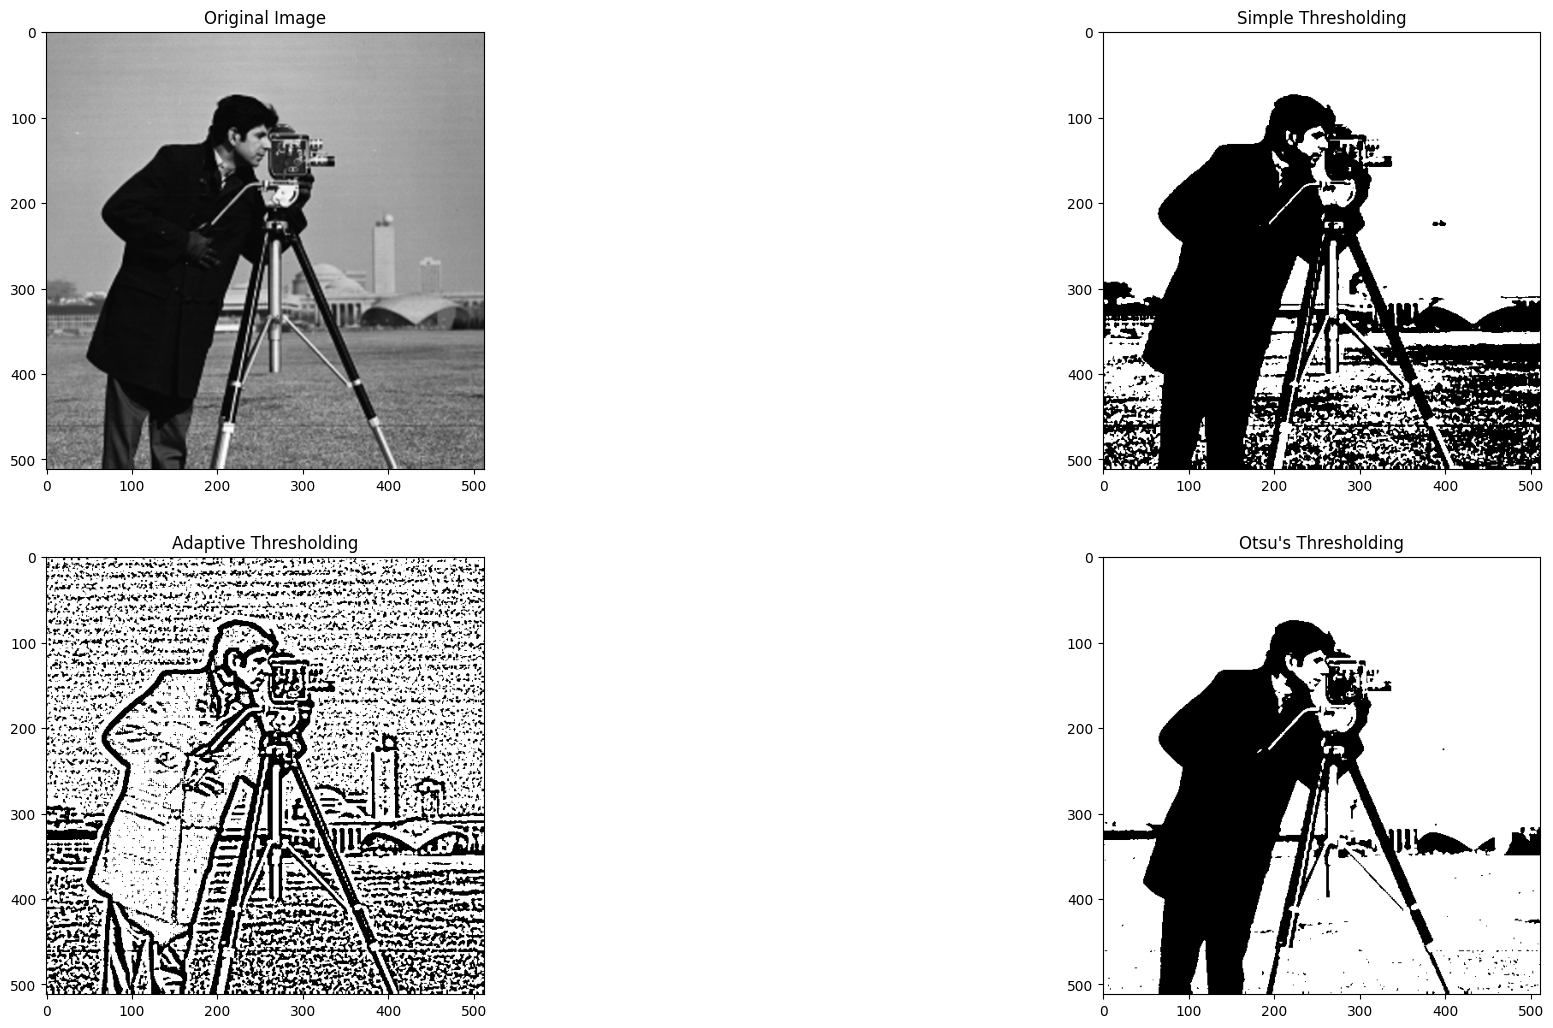

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./images/cameraman.tif', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Could not open or find the image")
else:
    # Simple thresholding
    ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Adaptive thresholding
    thresh2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Otsu's thresholding
    ret, thresh3 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the images
    plt.figure(figsize=(25, 12.5))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 2, 2)
    plt.imshow(thresh1, cmap='gray')
    plt.title('Simple Thresholding')

    plt.subplot(2, 2, 3)
    plt.imshow(thresh2, cmap='gray')
    plt.title('Adaptive Thresholding')

    plt.subplot(2, 2, 4)
    plt.imshow(thresh3, cmap='gray')
    plt.title("Otsu's Thresholding")

    plt.show()


- Exercice : 


Dans cet exercice, nous utilisons une image importée du module data de la bibliothèque Scikit 
image. 
 
from skimage import data 
 
image = data.astronaut() 
plt.imshow(image) 
plt.show() 
 
Question : Générer une image pour chaque canal (rouge, vert, bleu), puis effectuer des 
segmentations avec les trois seuils suivant : [100, 150, 200]. Afficher le résultat.

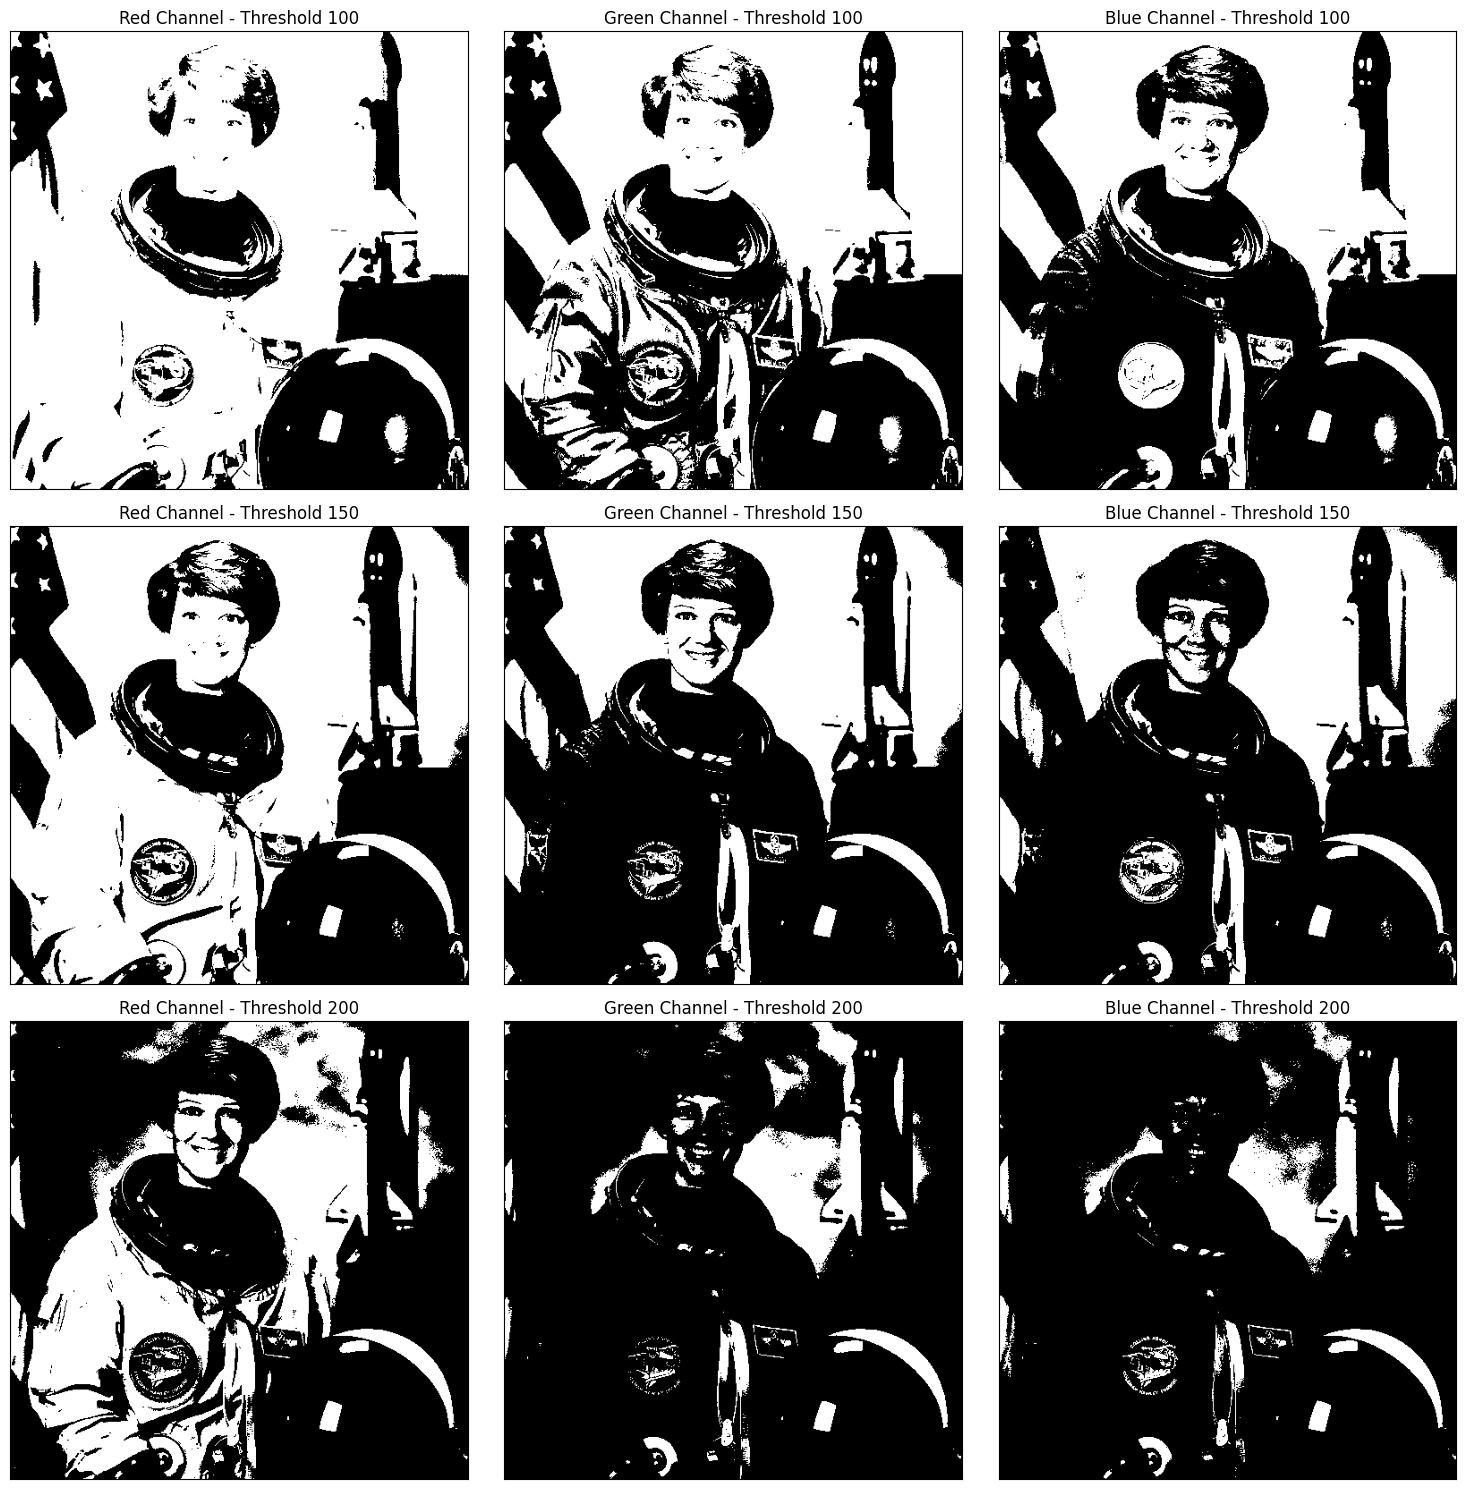

In [2]:
from skimage import data

# Load the astronaut image
image = data.astronaut()

# Split the image into red, green and blue channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Define the thresholds
thresholds = [100, 150, 200]

# Create a figure to display the images
fig, axs = plt.subplots(len(thresholds), 3, figsize=(15, 15))

# Apply thresholding to each channel and display the results
for i, threshold in enumerate(thresholds):
    _, red_thresh = cv2.threshold(red_channel, threshold, 255, cv2.THRESH_BINARY)
    _, green_thresh = cv2.threshold(green_channel, threshold, 255, cv2.THRESH_BINARY)
    _, blue_thresh = cv2.threshold(blue_channel, threshold, 255, cv2.THRESH_BINARY)

    axs[i, 0].imshow(red_thresh, cmap='gray')
    axs[i, 0].set_title(f'Red Channel - Threshold {threshold}')

    axs[i, 1].imshow(green_thresh, cmap='gray')
    axs[i, 1].set_title(f'Green Channel - Threshold {threshold}')

    axs[i, 2].imshow(blue_thresh, cmap='gray')
    axs[i, 2].set_title(f'Blue Channel - Threshold {threshold}')

# Remove the x and y ticks
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


## K-moyennes 


Dans cette partie, nous allons procéder à la segmentation d'une image à l'aide d'une méthode de 

regroupement appelée k-moyennes (k-Means). 

Les algorithmes de regroupement sont des algorithmes non supervisés, ce qui signifie qu'il n'y 

a pas de données étiquetées disponibles. Ils sont utilisés pour identifier différentes classes ou 

groupes  dans  les  données  sur  la  base  de  leurs  similarités.  Les  points  de  données  d'un  même 

groupe sont plus semblables aux autres points de données de ce même groupe qu'à ceux des 

autres groupes.  

Le regroupement par K-moyennes est l'un des algorithmes de regroupement les plus 

couramment utilisés. Le k représente le nombre de groupes.

Le regroupement par K-moyennes fonctionne comme suit : 

1. Choisissez le nombre de clusters que vous souhaitez trouver, soit k. 

2. Assignez aléatoirement les points de données à l'une des k clusters. 

3. Calculez ensuite le centre des clusters. 

4. Calculez la distance entre les points de données et les centres de chaque cluster. 

5. En fonction de la distance de chaque point de données par rapport au cluster, réaffectez les points de données aux clusters les plus proches. 

6. Calculez à nouveau le nouveau centre du cluster. 

7. Répétez les étapes 4, 5 et 6 jusqu'à ce que les points de données ne changent pas de 

cluster ou jusqu'à ce que le nombre d'itérations assigné soit atteint.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 


In [4]:
# Step 1: Choose the number of clusters k
k = 3

In [5]:
# Step 2: Select random centroids
np.random.seed(0)
centroids = np.random.randint(0, 255, (k, 3))

In [6]:
# Step 3: Assign each pixel to the nearest centroid
def assign_to_nearest_centroid(image, centroids):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)
    
    # Compute the distance from each pixel to each centroid
    distances = np.sqrt(np.sum((pixels[:, np.newaxis] - centroids) ** 2, axis=2))
    
    # Assign each pixel to the nearest centroid
    labels = np.argmin(distances, axis=1)
    
    return labels

In [7]:

# Step 4: Cacl the distance from centroids
# Step 4: Calculate the distance from each pixel to the centroids
def calcDistance(image, centroids):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)
    
    # Compute the distance from each pixel to each centroid
    distances = np.sqrt(np.sum((pixels[:, np.newaxis] - centroids) ** 2, axis=2))
    
    return distances

In [8]:

# Step 5:  Based on the distance of each data point from the cluster, reassign the data points to the closest clusters.
def update_centroids(image, labels, k):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)
    
    # Create an array to store the new centroids
    new_centroids = np.zeros((k, 3))
    
    # Update the centroids
    for i in range(k):
        new_centroids[i] = np.mean(pixels[labels == i], axis=0)
        
    return new_centroids


In [9]:
# 6. Calculate the new centroids for each cluster
def kmeans(image, k, centroids, n_iter):
    for _ in range(n_iter):
        # Step 3: Assign each pixel to the nearest centroid
        labels = assign_to_nearest_centroid(image, centroids)
        
        # Step 5: Update the centroids
        centroids = update_centroids(image, labels, k)
        
    return centroids, labels

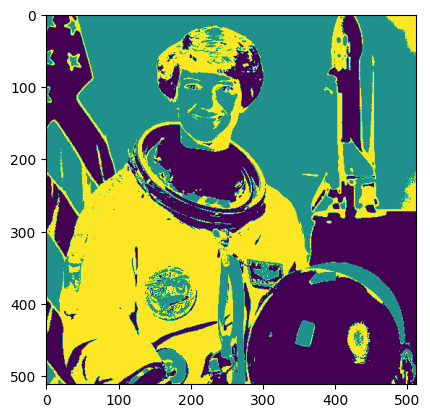

In [11]:
# Define the number of iterations for the k-means algorithm
n_iter = 50

# Apply the k-means algorithm to the image
centroids, labels = kmeans(image, k, centroids, n_iter)

# Reshape the labels to the original image shape
segmented_image = labels.reshape(image.shape[:2])

# Display the segmented image
plt.imshow(segmented_image)
plt.show()
